In [1]:
import networkx as nx # Graph Data Mining

# Packages for Data Analysis
import pandas as pd
import numpy as np

import random # Generating Random Number
from tqdm import tqdm # Progress Bar

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif']=['SimHei']  # To show Chinese Label, not necessary for English and other languages
plt.rcParams['axes.unicode_minus']=False  # To Show minus sign

In [2]:
df = pd.read_csv("G:\\文章\\知识图谱\\sedimentology.csv")

In [3]:
df.head()

,source,target,depth
0,Rimmed_carbonate_platform,RCP,1
1,FZ1,Rimmed_carbonate_platform,2
2,FZ2,Rimmed_carbonate_platform,2
3,FZ3,Rimmed_carbonate_platform,2
4,FZ4,Rimmed_carbonate_platform,2


In [4]:
df.shape

(633, 3)

In [5]:
G = nx.from_pandas_edgelist(df, "source", "target", edge_attr='depth', create_using=nx.Graph())

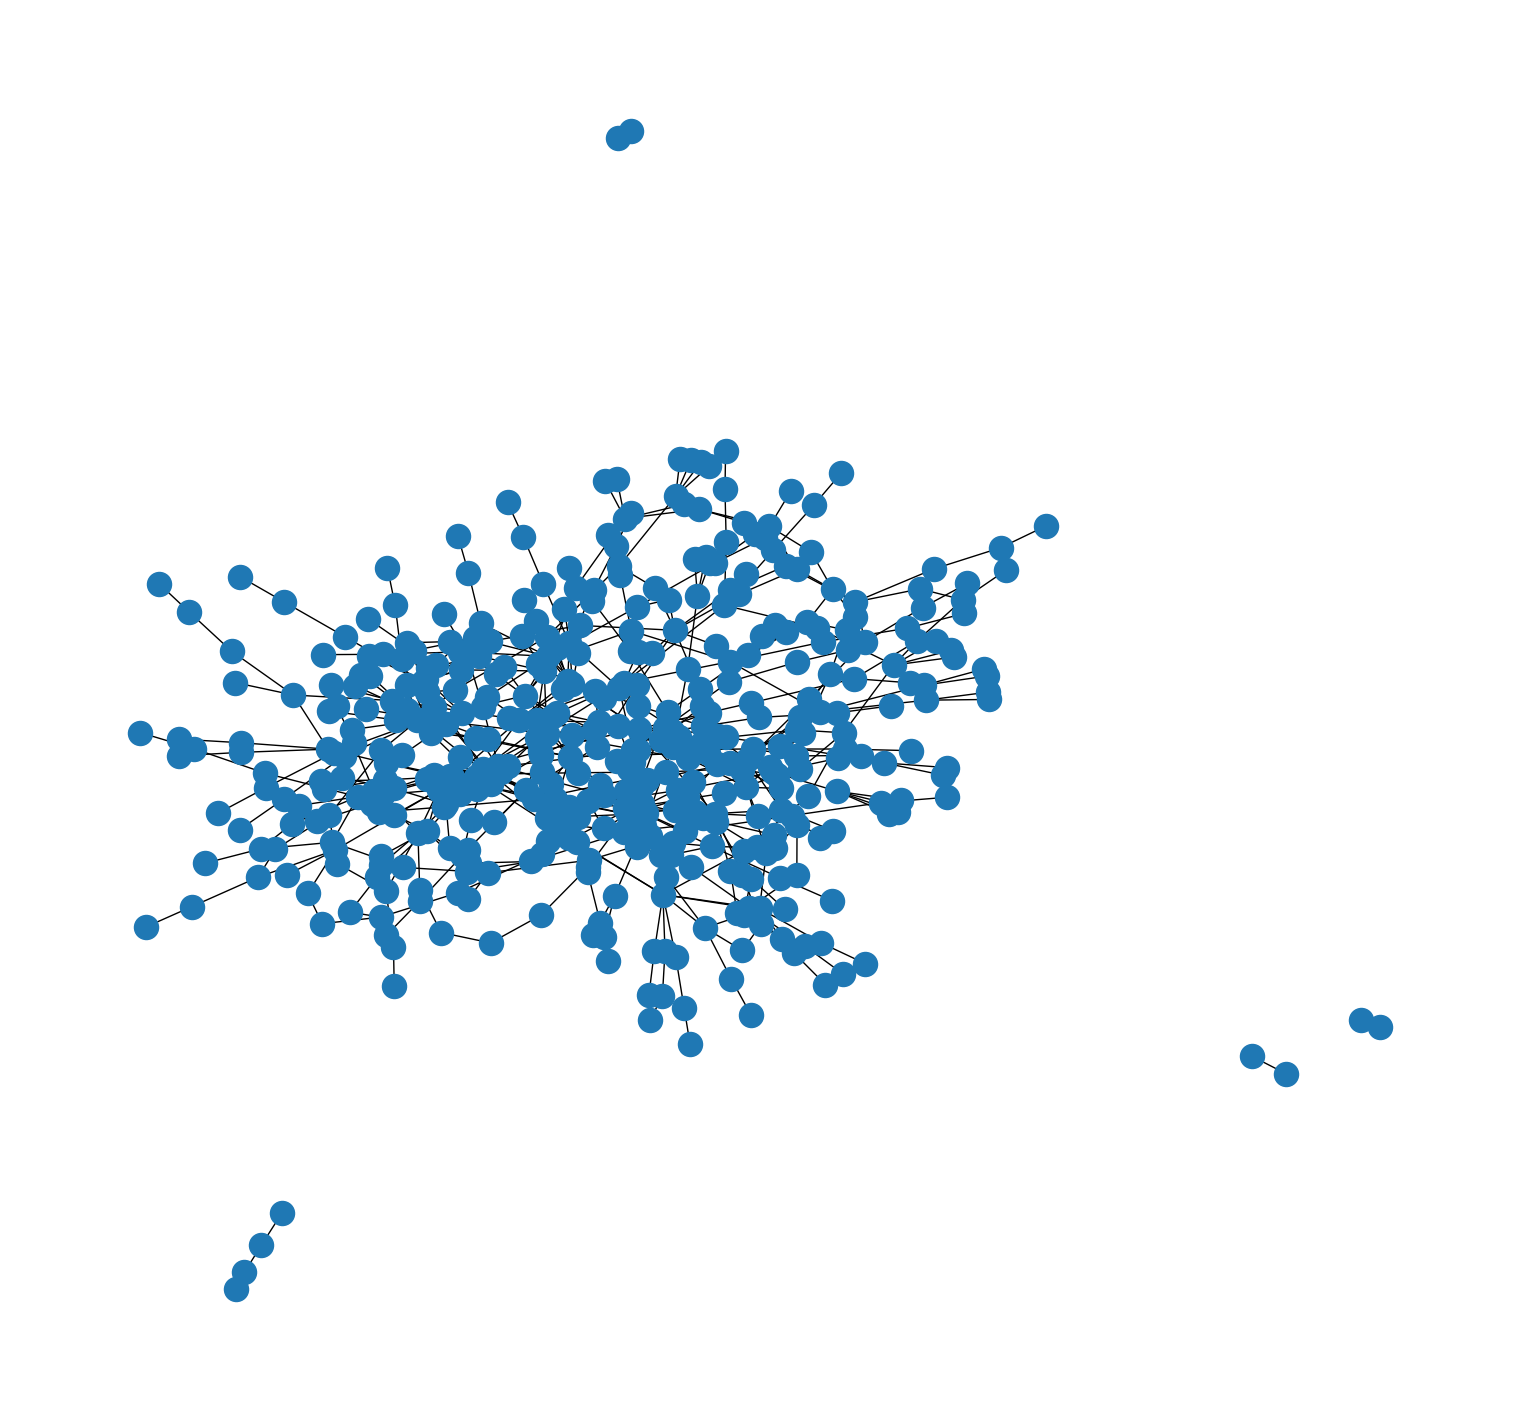

In [6]:
# Visualization
plt.figure(figsize=(15,14))
nx.draw(G)
plt.show()

In [7]:
def get_randomwalk(node, path_length):
    '''
    Input the initial node and the lenth of sequence
    '''
    
    random_walk = [node]
    
    for i in range(path_length-1):
        # Adjacent nodes
        temp = list(G.neighbors(node))
        temp = list(set(temp) - set(random_walk))    
        if len(temp) == 0:
            break
        # Select the next node from the sequence
        random_node = random.choice(temp)
        random_walk.append(random_node)
        node = random_node
        
    return random_walk

In [8]:
all_nodes = list(G.nodes())

In [9]:
get_randomwalk('SMF7', 5)

['SMF7', 'MSD20']

In [10]:
gamma = 5000 # the number of sequence
walk_length = 50 # Max lenth of the sequence

In [11]:
random_walks = []

for n in tqdm(all_nodes): # Traverse each node
    for i in range(gamma): # Generating gamma-number sequence from nodes
        random_walks.append(get_randomwalk(n, walk_length))

100%|████████████████████████████████████████████████████████████████████████████████| 452/452 [00:40<00:00, 11.13it/s]


In [12]:
random_walks[1]

['Rimmed_carbonate_platform',
 'FZ10',
 'SMF26',
 'G26',
 'G26t',
 'Grain_Tyes_pisoid']

In [13]:
from gensim.models import Word2Vec # NLP

In [14]:
model = Word2Vec(vector_size=256, # The dimension of Embedding
                 window=50, # The lenth of window
                 sg=1, # Skip-Gram
                 hs=0, # Softmax unlayered
                 negative=50, # Negative sampling
                 alpha=0.03,  # Initial learning rate 
                 min_alpha=0.0007, # Min learning rate
                 seed=14 # Random Seeds
                )

In [15]:
# Constructing vocabulary with random walk sequence
model.build_vocab(random_walks, progress_per=2)

In [16]:
# Training
model.train(random_walks, total_examples=model.corpus_count, epochs=500, report_delay=1)

(86379826, 98718525)

In [17]:
X = model.wv.vectors

In [18]:
# From 256 dimensions to 3 dimensions 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_embed_3d = pca.fit_transform(X)

In [19]:
# Add nodes
terms_chosen=(['FZ1','FZ2','FZ3','FZ4','FZ5','FZ6','FZ7','FZ8','FZ9',
                     'FZ10','SMF1','SMF2','SMF3','SMF4','SMF5','SMF6','SMF7','SMF8','SMF9','SMF10','SMF11','SMF12S','SMF12C','SMF13','SMF15C',
                     'SMF15R','SMF15M','SMF16L','SMF16NL','SMF17','SMF18','SMF19','SMF20','SMF21','SMF22','SMF23','SMF24','SMF25','SMF26',
                    'FZ10','FZ9','FZ8','FZ7','FZ6','FZ5','FZ4','FZ3','FZ2','FZ1','MSD26','MSD25','MSD24','MSD23','MSD22','MSD21',
                     'MSD20','MSD19','MSD18','MSD17','MSD16','MSD15','MSD14','MSD12','MSD11','MSD10','MSD9','MSD8','MSD7','MSD6','MSD5','MSD4',
                     'MSD3','MSD2','MSD1'])

In [20]:
FZ = ['FZ1','FZ2','FZ3','FZ4','FZ5','FZ6','FZ7','FZ8','FZ9', 'FZ10']

In [21]:
SMF = ['SMF1','SMF2','SMF3','SMF4','SMF5','SMF6','SMF7','SMF8','SMF9','SMF10','SMF11','SMF12S','SMF12C','SMF13','SMF15C',
                     'SMF15R','SMF15M','SMF16L','SMF16NL','SMF17','SMF18','SMF19','SMF20','SMF21','SMF22','SMF23','SMF24','SMF25','SMF26']

In [22]:
MSD = ['MSD26','MSD25','MSD24','MSD23','MSD22','MSD21','MSD20','MSD19','MSD18','MSD17','MSD16','MSD15','MSD14','MSD12','MSD11','MSD10','MSD9','MSD8','MSD7','MSD6','MSD5','MSD4',
                     'MSD3','MSD2','MSD1']

In [23]:
df = pd.DataFrame()
df['X'] = pca_embed_3d[:,0]
df['Y'] = pca_embed_3d[:,1]
df['Z'] = pca_embed_3d[:,2]
df['item'] = model.wv.index_to_key

In [24]:
df

,X,Y,Z,item
0,-0.561276,-0.702352,-0.078211,FZ8
1,-0.569042,-1.036897,-0.059648,Grain_content_abundant
2,-0.148791,-0.020986,-0.198442,FZ7
3,-0.385781,0.056565,-0.823385,Fossils_content_abundant
4,0.209724,-0.554287,0.357040,SMF15
...,...,...,...,...
447,0.246590,0.822183,5.348083,Fossils_Tyes_benthic foraminifera or calcareou...
448,0.215712,0.461616,5.097638,F17t
449,2.510235,-0.046714,3.634379,F22t
450,0.185405,0.469790,5.089451,Fossils_Tyes_foraminifera and algae


In [25]:
df.to_csv('pca_vis_pca3d_1.csv',index=False)

In [26]:
# Input word, output indes
term2index = model.wv.key_to_index
index2term = model.wv.index_to_key
term_index = np.array(term2index.values())

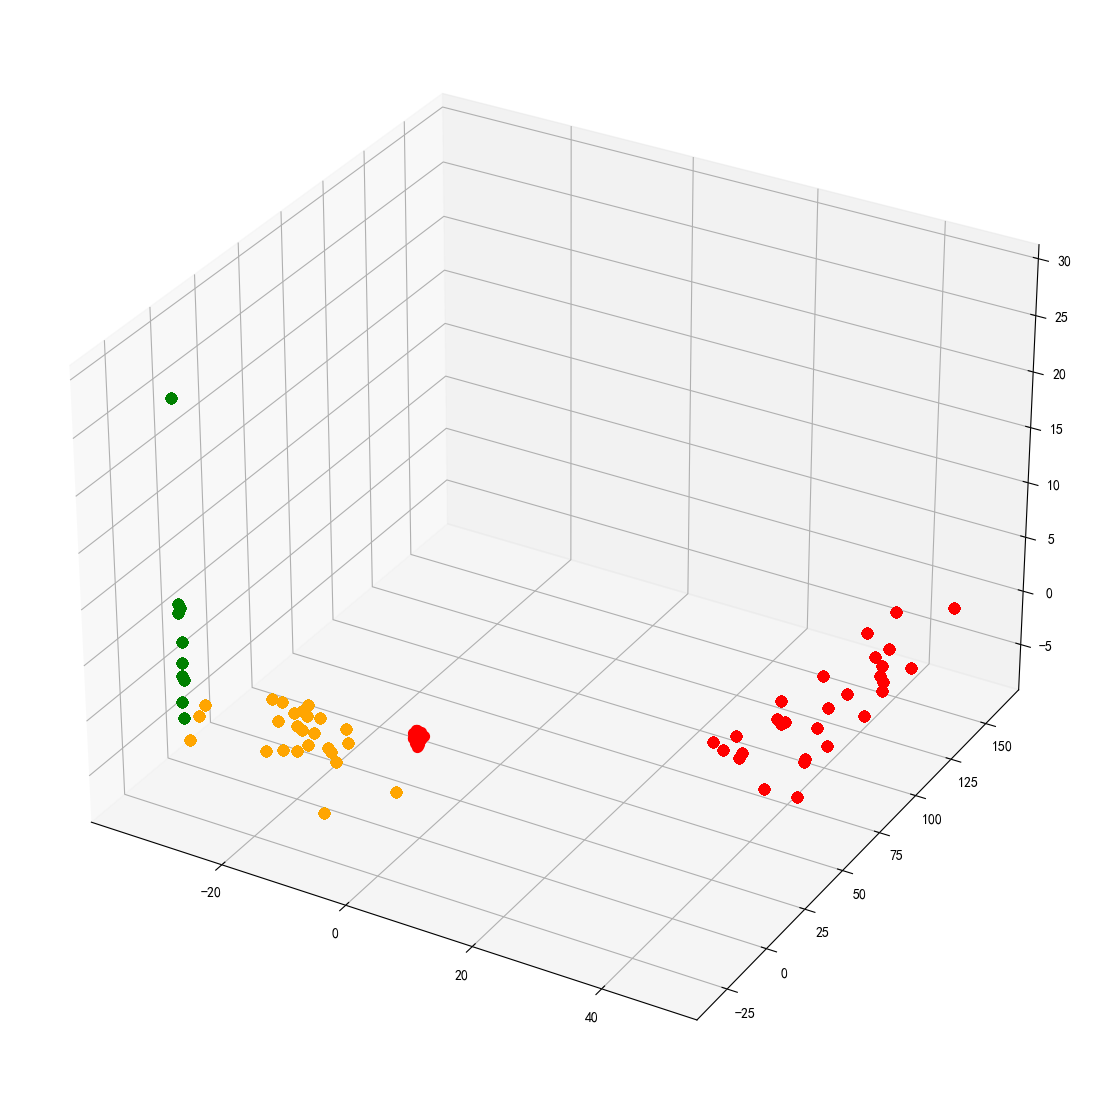

In [28]:
from mpl_toolkits import mplot3d
# %matplotlib notebook

# 3DVisualization
fig = plt.figure(figsize=(14,14))
ax = plt.axes(projection='3d')

for item in terms_chosen:
    idx = term2index[item]
    ax.scatter3D(pca_embed_3d[idx,0], pca_embed_3d[idx,1], pca_embed_3d[idx,2] ,c='r',s=50)

    for fz in FZ:
        idx_fz = term2index[fz]
        ax.scatter3D(np.abs(pca_embed_3d[idx_fz,0])-30, np.abs(pca_embed_3d[idx_fz,1])-30,50*np.abs(pca_embed_3d[idx_fz,2]),c='green',s=50)
    for smf in SMF:
        idx_smf = term2index[smf]
        ax.scatter3D((5)*np.log(np.abs(pca_embed_3d[idx_smf,0]))+50, (-50)*np.log(np.abs(pca_embed_3d[idx_smf,1]))+50,np.log(np.abs(pca_embed_3d[idx_smf,2])) ,c='red',s=50)
    for msd in MSD:
        idx_msd = term2index[msd]
        ax.scatter3D(10*np.log(np.abs(pca_embed_3d[idx_msd,0])), 10*np.log(np.abs(pca_embed_3d[idx_msd,1])), np.log(np.abs(pca_embed_3d[idx_msd,2])) ,c='orange',s=50)

plt.savefig("PCA_3D_2.svg")
plt.show()

In [29]:
terms_chosen_mask = np.zeros(X.shape[0])
for item in terms_chosen:
    idx = term2index[item]
    terms_chosen_mask[idx] = 1

In [30]:
df = pd.DataFrame()
df['X'] = pca_embed_3d[:,0]
df['Y'] = pca_embed_3d[:,1]
df['Z'] = pca_embed_3d[:,2]
df['item'] = model.wv.index_to_key
df = df.set_index('item')

In [31]:
df

,X,Y,Z
item,,,
FZ8,-0.561276,-0.702352,-0.078211
Grain_content_abundant,-0.569042,-1.036897,-0.059648
FZ7,-0.148791,-0.020986,-0.198442
Fossils_content_abundant,-0.385781,0.056565,-0.823385
SMF15,0.209724,-0.554287,0.357040
...,...,...,...
Fossils_Tyes_benthic foraminifera or calcareous green algae,0.246590,0.822183,5.348083
F17t,0.215712,0.461616,5.097638
F22t,2.510235,-0.046714,3.634379


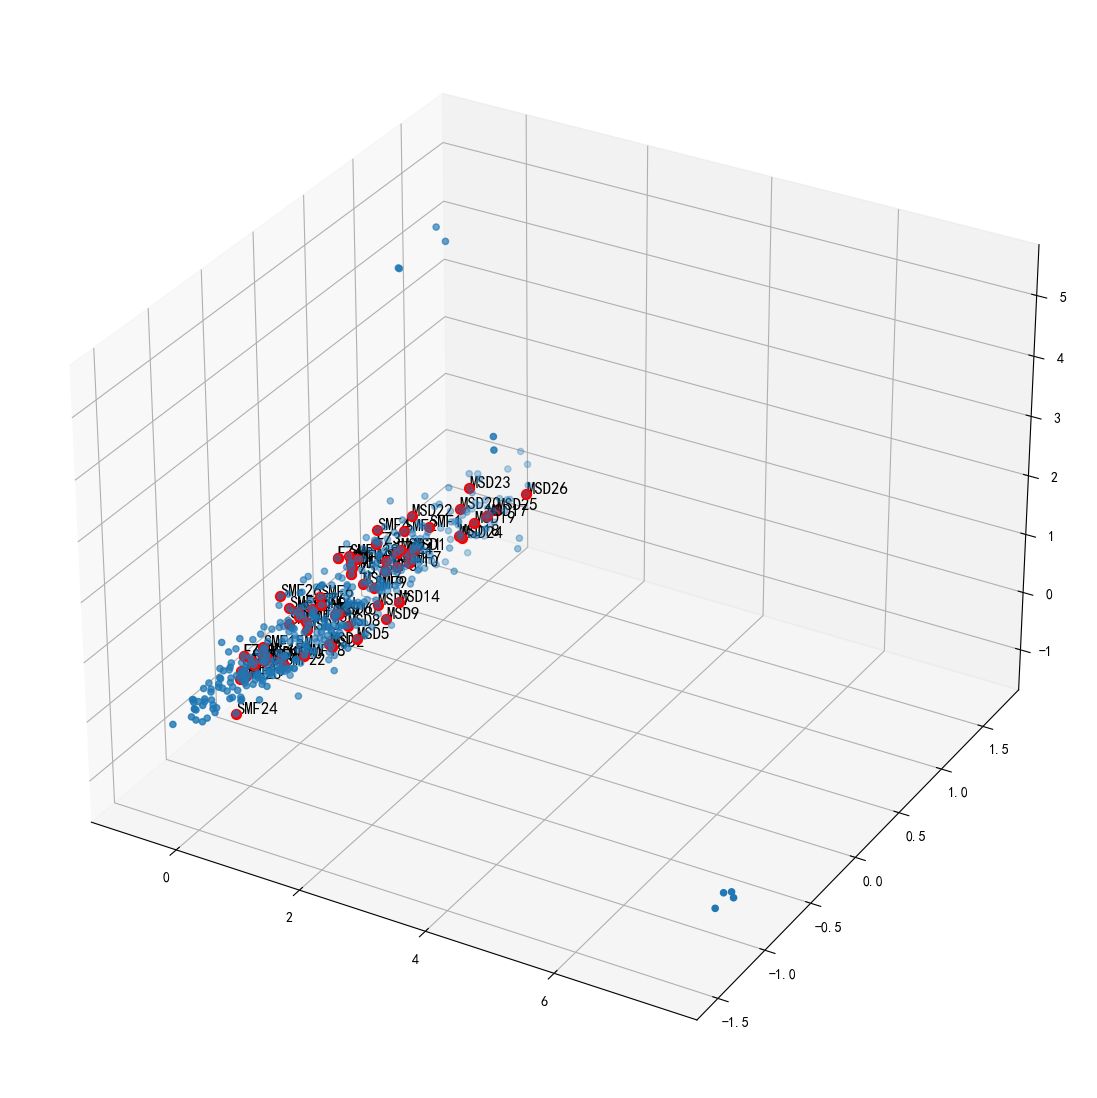

<Figure size 640x480 with 0 Axes>

In [32]:
from mpl_toolkits import mplot3d

df['X'] = pca_embed_3d[:,0]
df['Y'] = pca_embed_3d[:,1]
df['Z'] = pca_embed_3d[:,2]

# 3DVisualization
fig = plt.figure(figsize=(14,14))
ax = plt.axes(projection='3d')
ax.scatter3D(df['X'], df['Y'], df['Z'])

for item in terms_chosen:
    idx = term2index[item]
    ax.scatter3D(pca_embed_3d[idx,0], pca_embed_3d[idx,1], pca_embed_3d[idx,2] ,c='r',s=50)
    ax.text(pca_embed_3d[idx,0], pca_embed_3d[idx,1], pca_embed_3d[idx,2],item, c='k',fontsize=12)
plt.show()
plt.savefig("3d_fig_pca_2.svg")

In [33]:
# Search the vector of words
def w2v_search(word):
    
    v = df.loc[word, ['X','Y','Z']]
    
    return v

In [34]:
# Calculate the Euler distance of vectors
def distance_Euler(start, terminal):
    
    dis_x = (w2v_search(start)['X'] - w2v_search(terminal)['X'])**2
    dis_y = (w2v_search(start)['Y'] - w2v_search(terminal)['Y'])**2
    dis_z = (w2v_search(start)['Z'] - w2v_search(terminal)['Z'])**2
    distance = np.sqrt(dis_x + dis_y + dis_z)
    
    return distance

In [77]:
# Create softmax function and modify distance to probability

def softmax( f ):
    # instead: first shift the values of f so that the highest number is 0:
    f -= np.max(f) # f becomes [-666, -333, 0]
    return np.exp(f) / np.sum(np.exp(f))*20   # safe to do, gives the correct answer

In [36]:
def feature_confusion(sentence):
    start_matrix = np.identity(3)
    sentence_matrix = np.dot(np.array(w2v_search(sentence[0])).T,start_matrix.T)
    sentence_matrix = np.dot(np.array(w2v_search(sentence[1])).T,start_matrix)
    for i in range(2,len(sentence)):
        if np.mod(i, 3)==2:
            sentence_matrix = np.dot(np.array(w2v_search(sentence[i])).T,sentence_matrix.T)
        elif np.mod(i, 3)==0:
            sentence_matrix = np.dot(np.array(w2v_search(sentence[i])).T,sentence_matrix)
        elif np.mod(i, 3)==1:
            sentence_matrix = np.dot(np.array(w2v_search(sentence[i])).T,sentence_matrix)

    return sentence_matrix    

In [37]:
def smf_dis(conf):
    dis = [0]*28
    for i in range(28):
        dis[i] = np.sqrt(np.square(conf-w2v_search(smf.iloc[i])))
        dis.append(np.log(dis[i]))
        Dis = dis[0:28]
    
    return Dis

In [38]:
def horizon_normalization(matrix):
    h_norm = np.zeros(28)
    for i in range(28):
        h_norm[i] = np.linalg.norm(matrix[i])
    return h_norm

In [39]:
def vertical_norm(matrix):
    return softmax(matrix)

In [128]:
def pro_norm(data):
    norm_data = np.zeros(len(data))
    for i in range(len(data)):
        if data[i]<(np.min(data)+0.5):
            norm_data[i] = data[i]
        else:
            continue
    return norm_data/np.sum(norm_data)

In [41]:
def fz_dis(conf):
    dis = [0]*10
    for i in range(10):
        dis[i] = np.sqrt(np.square(conf-w2v_search(fz.iloc[i])))
        dis.append(np.log(dis[i]))
        Dis = dis[0:10]
    
    return Dis

In [42]:
def horizon_normalization_fz(matrix):
    h_norm = np.zeros(10)
    for i in range(10):
        h_norm[i] = np.linalg.norm(matrix[i])
    return h_norm

In [43]:
# Distance test
dis1 = distance_Euler('Fossils_Tyes_mollusk','SMF8')
dis2 = distance_Euler('SMF7','SMF8')
dis3 = distance_Euler('FZ4','SMF8')

In [44]:
dis1

0.8241958341995181

In [45]:
dis2

0.4043845771248875

In [46]:
dis3

0.9062155006239329

In [47]:
# Define a DataFrame, which the sequential int numbers (0，1，2，3......n) are index and standard microfacies (SMF1,SMF2,SMF3,......SMFn) 
# are objects, for searching
smf = ['SMF1','SMF2','SMF3','SMF4','SMF5','SMF6','SMF7','SMF8','SMF9','SMF10','SMF11','SMF12S','SMF12C','SMF13',
                   'SMF15C','SMF15R','SMF15M','SMF16L','SMF16NL','SMF17','SMF18','SMF19','SMF20','SMF21','SMF22','SMF23',
                   'SMF24','SMF25','SMF26']
smf = pd.DataFrame(smf)

In [48]:
id_73_s_conf = feature_confusion(['Grain_Tyes_bioclastic','Grain_content_common','Matrix_Tyes_micrite',
       'Matrix_content_common','Fossils_Tyes_crinoid',
       'Fossils_content_common',
       'Depositional_fabrics_strongly burrowed',
       'Texture_types_wackestone'])

In [49]:
id_73_s_conf

array([ 0.0001263 , -0.0005355 ,  0.00019114])

In [78]:
id_73_smf = smf_dis(id_73_s_conf)

In [79]:
id_73_smf

[            X        Y         Z
 item                            
 SMF1  0.03023  0.88077  0.099639,
              X         Y         Z
 item                              
 SMF2  0.360861  0.823048  0.003442,
              X         Y         Z
 item                              
 SMF3  0.045122  0.420636  0.042075,
              X        Y         Z
 item                             
 SMF4  0.311416  0.51547  0.459667,
              X         Y         Z
 item                              
 SMF5  0.135109  0.141288  0.373506,
              X        Y         Z
 item                             
 SMF6  0.113188  0.19527  0.357029,
              X         Y         Z
 item                              
 SMF7  0.096188  0.582347  0.086752,
              X         Y         Z
 item                              
 SMF8  0.296989  0.589686  0.181011,
              X         Y         Z
 item                              
 SMF9  0.103205  0.344264  0.250717,
               X         Y     

In [80]:
id_73_smf_hnorm = horizon_normalization(id_73_smf)

In [81]:
id_73_smf_hnorm

array([0.88690326, 0.89868837, 0.42513641, 0.75761659, 0.42157246,
       0.42238795, 0.59657902, 0.68461497, 0.4382098 , 0.49372268,
       0.52254208, 0.59271193, 0.49442717, 0.60529522, 0.44752033,
       0.73240437, 0.72433493, 0.35196874, 0.58831677, 0.82499611,
       0.79435311, 0.96926535, 0.62610923, 0.89906307, 0.79999144,
       0.97391732, 1.13693777, 1.02327477])

In [82]:
id_73_smf_vnorm = vertical_norm(id_73_smf_hnorm)

In [83]:
id_73_smf_vnorm

array([0.85609689, 0.86624577, 0.53948593, 0.75227119, 0.53756665,
       0.53800521, 0.64037844, 0.69931079, 0.54658514, 0.57778566,
       0.59467936, 0.63790682, 0.57819285, 0.6459845 , 0.5516979 ,
       0.73354186, 0.72764641, 0.50142249, 0.63510927, 0.80470553,
       0.78042091, 0.92959187, 0.65957093, 0.86657041, 0.78483361,
       0.93392638, 1.09928809, 0.98117915])

In [130]:
pro_norm(id_73_smf_vnorm)

array([0.04529443, 0.04583138, 0.02854315, 0.03980121, 0.02844161,
       0.02846481, 0.03388118, 0.03699918, 0.02891876, 0.03056952,
       0.03146333, 0.03375041, 0.03059106, 0.03417779, 0.02918927,
       0.03881028, 0.03849836, 0.02652929, 0.0336024 , 0.04257541,
       0.04129056, 0.0491829 , 0.03489662, 0.04584856, 0.04152402,
       0.04941223, 0.        , 0.05191229])

In [85]:
fz = ['FZ1','FZ2','FZ3','FZ4','FZ5','FZ6','FZ7','FZ8','FZ9', 'FZ10']
fz = pd.DataFrame(fz)

In [86]:
sq_1 = ['SMF19','SMF18']

In [87]:
sq_1_conf = feature_confusion(sq_1)

In [88]:
sq_1_conf

array([-0.34385511, -0.23453331, -0.67650574])

In [131]:
sq_1_fz = fz_dis(sq_1_conf)

In [132]:
sq_1_fz

[             X         Y         Z
 item                              
 FZ1   0.417755  0.837393  0.712663,
              X        Y         Z
 item                             
 FZ2   0.117438  0.89303  0.569028,
              X        Y         Z
 item                             
 FZ3   0.046338  0.78329  0.822336,
              X         Y         Z
 item                              
 FZ4   0.060189  0.320806  1.249453,
              X         Y         Z
 item                              
 FZ5   0.154978  0.398849  0.891063,
              X        Y         Z
 item                             
 FZ6   0.023723  0.19676  0.590882,
              X         Y         Z
 item                              
 FZ7   0.195064  0.213548  0.478064,
             X         Y         Z
 item                             
 FZ8   0.21742  0.467819  0.598294,
              X         Y        Z
 item                             
 FZ9   0.112297  0.561992  0.68381,
              X         Y         

In [133]:
sq_1_fz_hnorm = horizon_normalization_fz(sq_1_fz)

In [134]:
sq_1_fz_hnorm

array([1.17628002, 1.06540502, 1.13662954, 1.29138387, 0.98848005,
       0.62323257, 0.55874656, 0.78998878, 0.89221236, 1.01660051])

In [135]:
sq_1_fz_vnorm = vertical_norm(sq_1_fz_hnorm)

In [136]:
sq_1_fz_vnorm

array([2.43720576, 2.18142253, 2.34246014, 2.73452038, 2.01990855,
       1.40186677, 1.31431912, 1.65625821, 1.83452307, 2.07751548])

In [137]:
pro_norm(sq_1_fz_vnorm)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.320614  , 0.30059141, 0.3787946 , 0.        , 0.        ])